In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from afinn import Afinn
afinn = Afinn(emoticons=True)

In [21]:
def getSentiment(text, lexicon):
    score = lexicon.score(text)
    if (score > 0):
        return 'Positive'
    if (score < 0):
        return 'Negative'
    if (score == 0):
        return 'Neutral'

In [34]:
sentiment = pd.read_csv('sentiment.csv')

In [35]:
emoji = pd.read_csv('emoji_sentiment.csv')

In [37]:
emoji

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons
...,...,...,...,...,...,...,...,...,...
964,➛,0x279b,1,0.011628,0,1,0,DRAFTING POINT RIGHTWARDS ARROW,Dingbats
965,♝,0x265d,1,0.280000,0,1,0,BLACK CHESS BISHOP,Miscellaneous Symbols
966,❋,0x274b,1,0.888889,0,1,0,HEAVY EIGHT TEARDROP-SPOKED PROPELLER ASTERISK,Dingbats
967,✆,0x2706,1,0.557252,0,1,0,TELEPHONE LOCATION SIGN,Dingbats


In [75]:
getSentiment('😁', afinn)

'Neutral'

Link do emoji: http://kt.ijs.si/data/Emoji_sentiment_ranking/index.html

In [51]:
emoji.head()

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


In [63]:
set(emoji['Emoji']).intersection('@metaspatial_i good project go moon 🚀 🚀 🚀 @m')

{'🚀'}

In [76]:
text = '@metaspatial_i good project go moon 🚀 🚀 🚀 @m'

In [77]:
item = set(emoji['Emoji']).intersection(text)

In [78]:
list(item)

['🚀']

In [96]:
def replaceEmojiByName(tweet):
    intersection = set(emoji['Emoji']).intersection(tweet)

    listOfEmojis = list(intersection)

    if (len(listOfEmojis) > 0):
        for emoji_item in listOfEmojis:
            tweet = tweet.replace(emoji_item, emoji[emoji['Emoji'] == emoji_item]['Unicode name'].item().lower())
        return tweet
    return tweet


In [97]:
replaceEmojiByName('@metaspatial_i good project go moon 🚀 🚀 🚀 @m')

'@metaspatial_i good project go moon rocket rocket rocket @m'

In [79]:
emoji.head()

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


In [43]:
def tokenizeText(instancia):
    '''
    Recebe o texto e retorna uma lista de tokens.
    '''
    return nltk.tokenize.TweetTokenizer().tokenize(instancia)

In [100]:
sentiment['processed_text_emojiname'] = sentiment.apply(lambda row: replaceEmojiByName(row['processed_text']), axis=1)

### Base de dados atualizada

In [102]:
sentiment.to_csv('sentiment_and_emojiname.csv')

# Identifying number of each sentiments by month (for each particular lexicon)

Presence of these terms

Singular

- metaverse is (139237)
- what metaverse (2932)
- is metaverse (31952)
- what is metaverse (1794)
- what metaverse is (884)

Plural

- metaverses are (604)
- what metaverses (26)
- are metaverses (58)
- what are metaverses (0)
- what metaverses are (9)

In [103]:
relatedTopics = 'metaverse is|what metaverse|is metaverse|what is metaverse|what metaverse is|metaverses are|what metaverses|are metaverses|what metaverses are'

In [7]:
sentiment.datetime = pd.to_datetime(sentiment.datetime)

In [110]:
sentiment[sentiment['text_lower'].str.contains('how metaverse', regex=True)]['text_lower'][43320]

'decided not to post the nft shit cus ik at least a few are gonna get up in arms about how metaverse totally isnt a platform used by nft people so their nfts can feign significance'

### Textblob sentiment by month (related)

In [134]:
text_blob_sentiment_related = sentiment[sentiment['text_lower'].str.contains(relatedTopics, regex=True)].set_index('datetime').groupby('textblob_sentiment')['text_lower'].resample('M').count()
text_blob_sentiment_related.to_csv('textblob_sentiment_related.csv')

In [17]:
sentiment['month'] = sentiment.datetime.dt.month

In [25]:
sentiment.set_index('datetime').groupby('textblob_sentiment')['text_lower'].resample('M').count()

textblob_sentiment  datetime                 
Negative            2021-10-31 00:00:00+00:00     27669
                    2021-11-30 00:00:00+00:00     50131
                    2021-12-31 00:00:00+00:00     46746
                    2022-01-31 00:00:00+00:00     53981
                    2022-02-28 00:00:00+00:00     46179
                    2022-03-31 00:00:00+00:00     39983
                    2022-04-30 00:00:00+00:00     36861
Neutral             2021-10-31 00:00:00+00:00    135791
                    2021-11-30 00:00:00+00:00    290319
                    2021-12-31 00:00:00+00:00    256491
                    2022-01-31 00:00:00+00:00    280475
                    2022-02-28 00:00:00+00:00    237510
                    2022-03-31 00:00:00+00:00    221270
                    2022-04-30 00:00:00+00:00    234481
Positive            2021-10-31 00:00:00+00:00    143687
                    2021-11-30 00:00:00+00:00    329888
                    2021-12-31 00:00:00+00:00    280809
  

In [26]:
sns.catplot(x='text_lower', hue="textblob_sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=sentiment)

In [ ]:
sentiment.

### Vader sentiment by month (related)

In [142]:
vader_sentiment_related = sentiment[sentiment['text_lower'].str.contains(relatedTopics, regex=True)].set_index('datetime').groupby('vader_sentiment')['text_lower'].resample('M').count()
vader_sentiment_related.to_csv('vader_sentiment_related.csv')

### Afinn sentiment by month (related)

In [144]:
afinn_sentiment_related = sentiment[sentiment['text_lower'].str.contains(relatedTopics, regex=True)].set_index('datetime').groupby('afinn_sentiment')['text_lower'].resample('M').count()
afinn_sentiment_related.to_csv('afinn_sentiment_related.csv')

In [127]:
sentiment.to_csv('sentiment.csv', index=False)

textblob_sentiment  datetime                 
Negative            2021-10-31 00:00:00+00:00     2753
                    2021-11-30 00:00:00+00:00     4075
                    2021-12-31 00:00:00+00:00     3615
                    2022-01-31 00:00:00+00:00     5022
                    2022-02-28 00:00:00+00:00     3802
                    2022-03-31 00:00:00+00:00     2154
                    2022-04-30 00:00:00+00:00     2027
Neutral             2021-10-31 00:00:00+00:00     7897
                    2021-11-30 00:00:00+00:00    14473
                    2021-12-31 00:00:00+00:00    11640
                    2022-01-31 00:00:00+00:00    12956
                    2022-02-28 00:00:00+00:00     9734
                    2022-03-31 00:00:00+00:00     7614
                    2022-04-30 00:00:00+00:00     6569
Positive            2021-10-31 00:00:00+00:00     7959
                    2021-11-30 00:00:00+00:00    15088
                    2021-12-31 00:00:00+00:00    12498
                   

In [200]:
afinn_sentiment_related = sentiment[sentiment['text_lower'].str.contains(relatedTopics, regex=True)].set_index('datetime').groupby('afinn_sentiment')['text_lower'].resample('M').count()


In [159]:
import matplotlib.pyplot as plt

In [201]:
afinn_sentiment_related.unstack(level=0)

afinn_sentiment,Negative,Neutral,Positive
datetime,,,
2021-10-31 00:00:00+00:00,3443,8716,6450
2021-11-30 00:00:00+00:00,4888,15534,13214
2021-12-31 00:00:00+00:00,4475,12831,10447
2022-01-31 00:00:00+00:00,6164,14509,10882
2022-02-28 00:00:00+00:00,4674,11232,9072
2022-03-31 00:00:00+00:00,2523,8583,7885
2022-04-30 00:00:00+00:00,2244,7273,6996


In [194]:
sentiment['month'] = sentiment.datetime.dt.month

In [1]:
sentiment.head()

NameError: name 'sentiment' is not defined

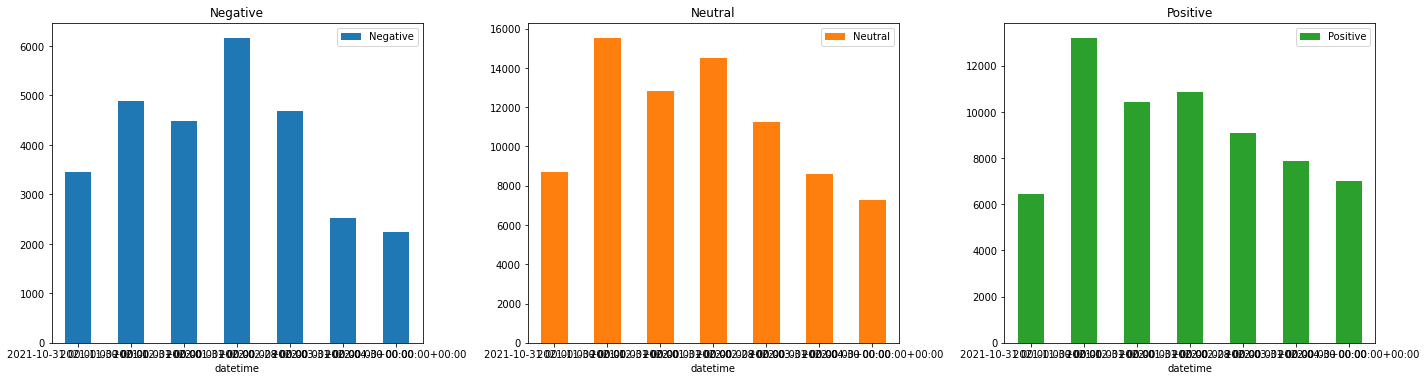

In [170]:
afinn_sentiment_related.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 10), layout=(2, 3))
plt.tight_layout()